## Telco_Customer_Churn 

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as  sns

In [210]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [211]:
df.shape

(7043, 21)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [213]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [214]:
col_cate = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
print('Unique values of each features')
for col in col_cate:
       print(col, df[col].unique())
       print('-' * 100)

Unique values of each features
customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------------------------------------
gender ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen [0 1]
----------------------------------------------------------------------------------------------------
Partner ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents ['No' 'Yes']
----------------------------------------------------------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
-----------------------------------------------

In [215]:
## Here we are droping the customerId this data my effect the while model build

df = df.drop(columns=['customerID'],axis= 1)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [216]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C:\Users\chilesh\AppData\Local\Temp\ipykernel_26488\3313738663.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Churn'],palette=['red','blue'])


Text(0.5, 1.0, 'Total number of Churns')

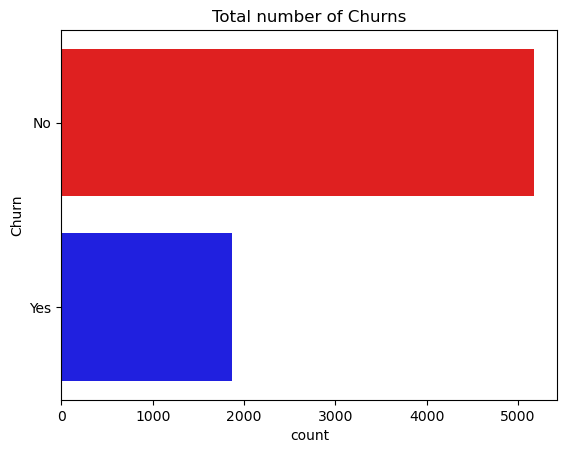

In [217]:
sns.countplot(df['Churn'],palette=['red','blue'])
plt.title('Total number of Churns')

In [218]:
df.select_dtypes(exclude = 'object')

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [219]:
df.TotalCharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [220]:
df[df['TotalCharges']== " "]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [221]:
len(df[df["TotalCharges"]== " "])

11

In [222]:
df['TotalCharges']=df['TotalCharges'].replace({" " :"0.0"})

In [223]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Exploratory Data Analysis (EDA)

In [225]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


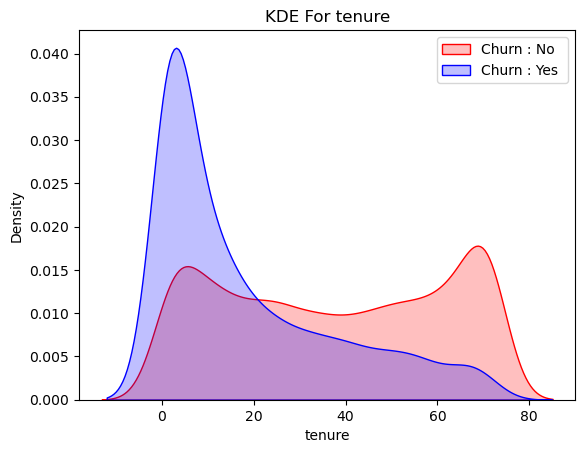

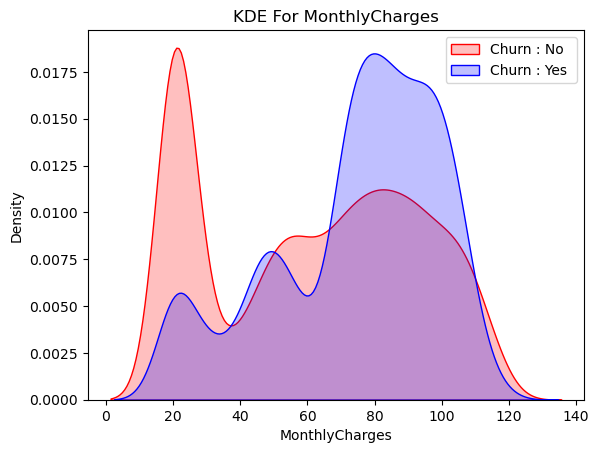

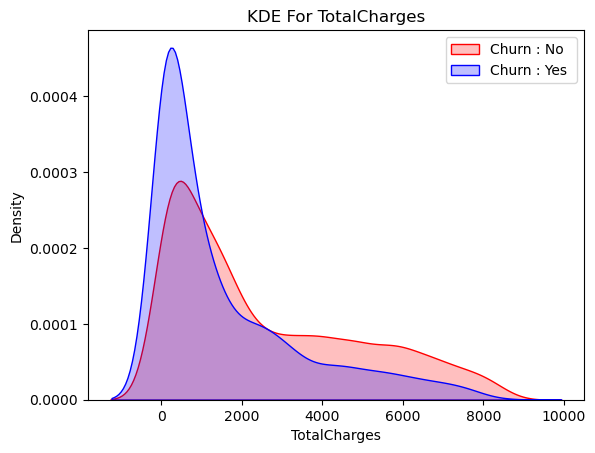

In [226]:
def kdeplot(Feature):
    plt.Figure(figsize=(9,8))
    plt.title(f"KDE For {Feature}")
    
    ax0 = sns.kdeplot(df[df['Churn']=='No'][Feature].dropna(),color='red',label = 'Churn : No ',fill =True)
    ax0 = sns.kdeplot(df[df['Churn']=='Yes'][Feature].dropna(),color='blue',label = 'Churn : Yes ',fill =True)
    
    plt.legend()
    plt.show()

kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

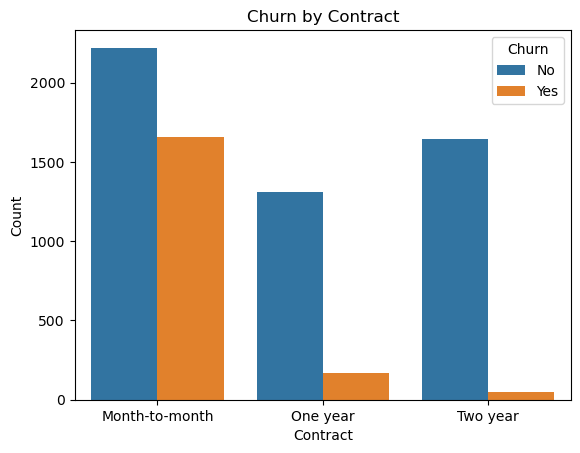

In [227]:
## Now WE Plot Contract and Churn
sns.countplot(x = 'Contract',hue='Churn',data =  df)
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

C:\Users\chilesh\AppData\Local\Temp\ipykernel_26488\1818212438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y ='MonthlyCharges',x= 'Churn',data=df,palette= ['brown','pink'])


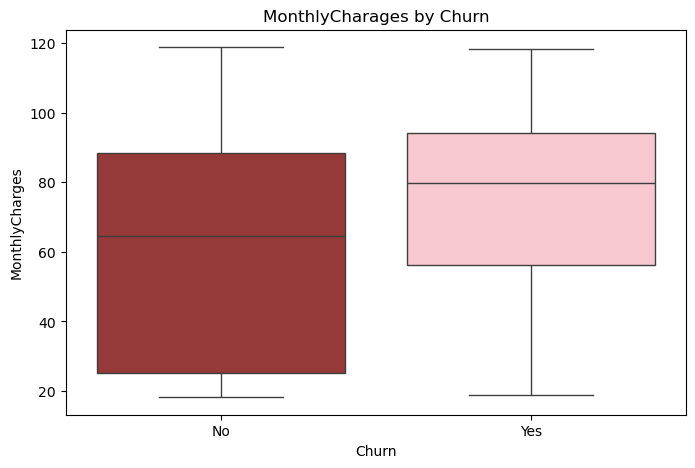

In [228]:
plt.figure(figsize = (8,5))
sns.boxplot(y ='MonthlyCharges',x= 'Churn',data=df,palette= ['brown','pink'])
plt.title('MonthlyCharages by Churn')
plt.show()

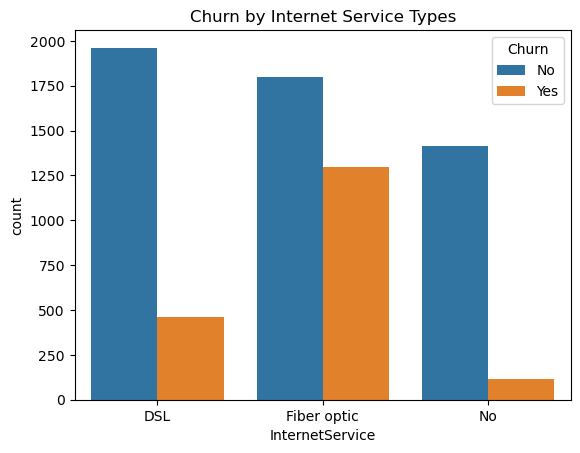

In [229]:
plt.Figure(figsize=(8,5))
sns.countplot(x='InternetService',hue ='Churn',data = df)
plt.title('Churn by Internet Service Types')
plt.show()

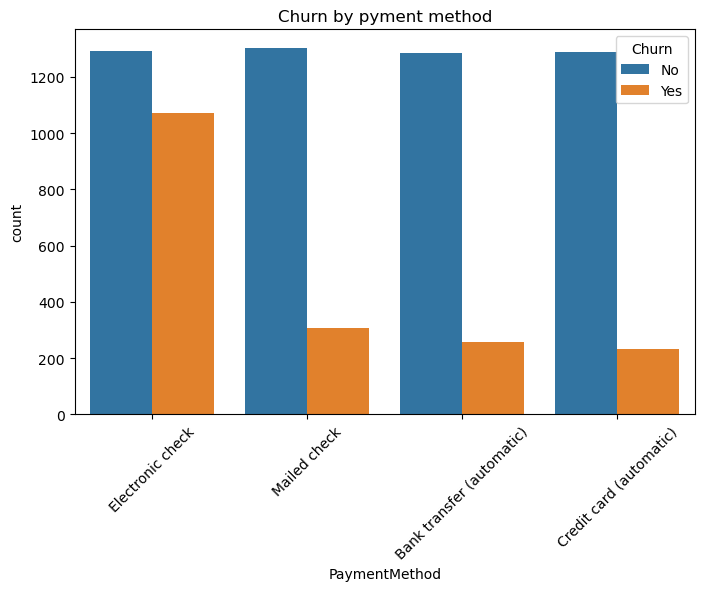

In [230]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod',hue= 'Churn',data=df)
plt.xticks(rotation=45)
plt.title('Churn by pyment method')
plt.show()

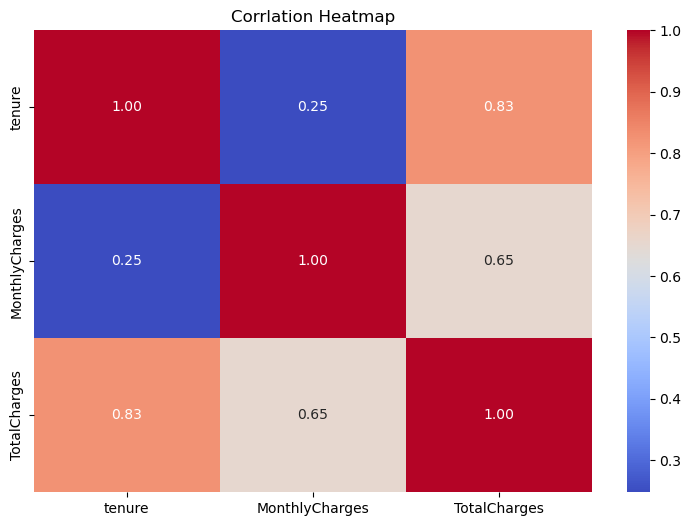

In [231]:
plt.figure(figsize = (9,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot = True, cmap ="coolwarm" ,fmt= ".2f")
plt.title('Corrlation Heatmap')
plt.show()

## Feature Engineering

In [232]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [233]:
df['NewCustomer'] = (df['tenure'] < 6).astype(int)

# Encoding

In [234]:
df.select_dtypes(include='object').head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [237]:
# Converting the data NO phone -> no

col_cate = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
print('Unique values of each features')
for col in col_cate:
    cols = df[col].unique()
    if len(cols) == 3 :
        print(col,cols)
        print('=' * 100)

Unique values of each features
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']


In [242]:
df['MultipleLines'].replace({'No phone service': 'No'},inplace=True)
df['OnlineBackup'].replace({'No internet service':'No'},inplace = True)
df['OnlineSecurity'].replace({'No internet service':'No'},inplace=True)
df['DeviceProtection'].replace({'No internet service':'No'},inplace=True)
df['TechSupport'].replace({'No internet service':'No'},inplace=True)
df['StreamingTV'].replace({'No internet service':'No'},inplace=True)
df['StreamingMovies'].replace({'No internet service':'No'},inplace=True)


C:\Users\chilesh\AppData\Local\Temp\ipykernel_26488\4161674996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MultipleLines'].replace({'No phone service': 'No'},inplace=True)
C:\Users\chilesh\AppData\Local\Temp\ipykernel_26488\4161674996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [245]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NewCustomer
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [250]:

col_cate = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
print('Unique values of each features')
for col in col_cate:
    cols = df[col].unique()
    if len(cols) == 2:
        print(col,cols)
        print('=' * 100)

Unique values of each features
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [252]:
enco_col = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
            'OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

for ecol in enco_col:
    df[ecol].replace({'Yes':1,
                  'No':0},inplace = True)

C:\Users\chilesh\AppData\Local\Temp\ipykernel_26488\4062774001.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[ecol].replace({'Yes':1,
C:\Users\chilesh\AppData\Local\Temp\ipykernel_26488\4062774001.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[ecol].replace({'Yes':1,


In [269]:
df['gender'].replace({'Female':1,'Male':0},inplace= True)
df['Churn'].replace({'Yes':1,'No':0},inplace=True)

C:\Users\chilesh\AppData\Local\Temp\ipykernel_26488\4031757960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':1,'Male':0},inplace= True)
C:\Users\chilesh\AppData\Local\Temp\ipykernel_26488\4031757960.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].

In [258]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NewCustomer
0,1,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No,1
1,0,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,No,0
2,0,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,1
3,0,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,1


In [261]:
## Encoding  Categories using one-hotEncoding

df = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'], dtype=int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [266]:
df.shape

(7043, 28)

In [268]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
NewCustomer                                  int64
InternetService_DSL                          int64
InternetService_Fiber optic    

In [271]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [273]:
## SCaling Numerical Features 
col_cols = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_cols] = scaler.fit_transform(df[col_cols])

In [274]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [275]:
dfs = df.copy()

In [276]:
dfs.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [279]:
for col in dfs:
    print(f'{col}: {dfs[col].unique()}')
    print('_' * 100)

gender: [1 0]
____________________________________________________________________________________________________
SeniorCitizen: [0 1]
____________________________________________________________________________________________________
Partner: [1 0]
____________________________________________________________________________________________________
Dependents: [0 1]
____________________________________________________________________________________________________
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 

In [281]:
# Splitting Feature
X = dfs.drop(columns='Churn')
y= dfs['Churn']


In [285]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [286]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [287]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


# Handeling Data Imbalanced Data 

In [ ]:


from imblearn.over_sampling import SMOTE

smote =  SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [290]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


# ModelBuilding

In [298]:
from sklearn.svm import SVC

In [299]:
model_svc =  SVC(random_state=42)
model_svc.fit(X_train_smote,y_train_smote)

accuracy_svc = model_svc.score(X_train,y_train)
print("Accuracy of Support Vector Machine : ", accuracy_svc)

Accuracy of Support Vector Machine :  0.7949946751863685


In [295]:
ran_model =  RandomForestClassifier()
ran_model.fit(X_train_smote,y_train_smote)

accuracy_ran = ran_model.score(X_test,y_test)

In [297]:
print("Accuracy of Random Forest:",accuracy_ran)

Accuracy of Random Forest: 0.7771469127040455


C:\Users\chilesh\AppData\Local\Temp\ipykernel_26488\1926369694.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'],y=feature_importance_df['Features'],palette='Set2')


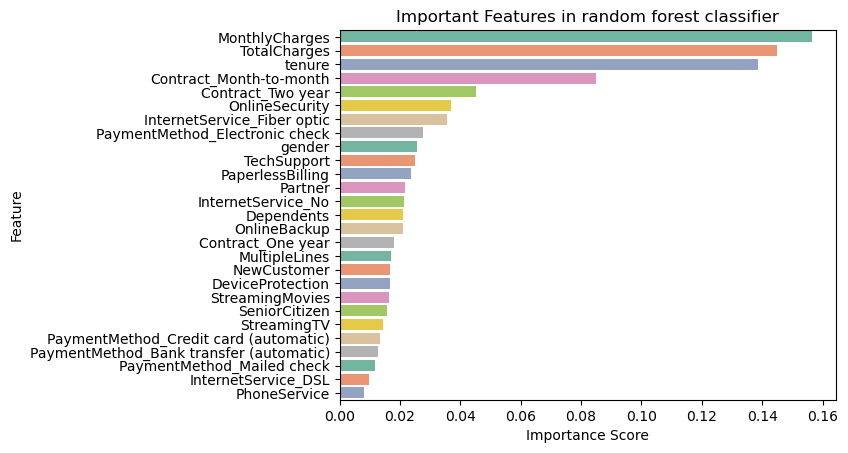

In [307]:
feature_importance = ran_model.feature_importances_

feature_importance_df = pd.DataFrame({'Features':X_train_smote.columns,'Importance':feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False)

plt.Figure(figsize=(20,20))
sns.barplot(x=feature_importance_df['Importance'],y=feature_importance_df['Features'],palette='Set2')
plt.title('Important Features in random forest classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## without Smote

In [308]:
from sklearn.linear_model import LogisticRegression


In [309]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [310]:
accuracy_lr = lr.score(X_train,y_train)
print("Accuracy LogiticRegression:",accuracy_lr)



Accuracy LogiticRegression: 0.7495562655307064


In [316]:
## Prediction 

y_pred_rf  = ran_model.predict(X_test)
y_pred_svc  = model_svc.predict(X_test)
y_pred_lr = lr.predict(X_test)

print(y_pred_rf)
print(y_pred_svc)
print(y_pred_lr)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 1]
[1 0 0 ... 0 0 1]


In [311]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [312]:
## Model prediction 

models = {
    'RandomForestClassifier':ran_model,
    'SVC': model_svc,
    'LogisticRegression':lr
}


for  name , model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))


RandomForestClassifier
Accuracy: 0.7771469127040455
Precision: 0.5694117647058824
Recall: 0.6487935656836461
F1: 0.606516290726817

SVC
Accuracy: 0.7579843860894251
Precision: 0.5298507462686567
Recall: 0.7613941018766756
F1: 0.6248624862486248

LogisticRegression
Accuracy: 0.7558552164655784
Precision: 0.5248713550600344
Recall: 0.8203753351206434
F1: 0.6401673640167364


In [ ]:

## confusion Matrix and &  Classification report with RandomforestClassifier
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[853 183]
 [131 242]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.57      0.65      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [ ]:

## confusion Matrix and &  Classification report with SVM 
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


[[784 252]
 [ 89 284]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1036
           1       0.53      0.76      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [319]:

## confusion Matrix and &  Classification report with logisticRegression
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



[[759 277]
 [ 67 306]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.52      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.81      0.76      0.77      1409



# Hyperparmeter